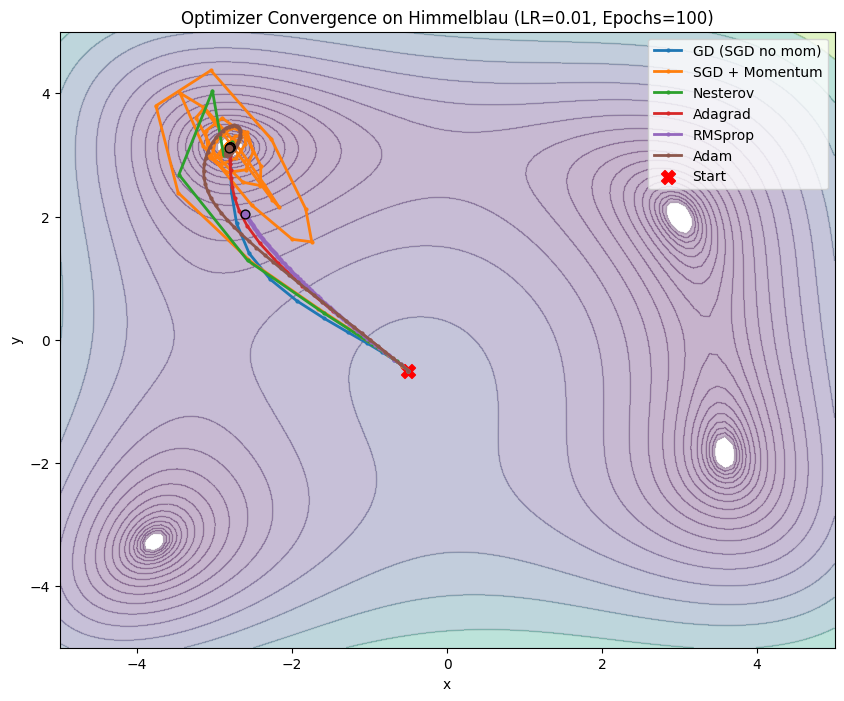

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

start_pos = [-0.5, -0.5]  
epochs = 100
lr = 0.01

def get_optimizers(params):
    return {
        "GD (SGD no mom)": torch.optim.SGD(params, lr=lr),
        "SGD + Momentum": torch.optim.SGD(params, lr=lr, momentum=0.9),
        "Nesterov": torch.optim.SGD(params, lr=lr, momentum=0.9, nesterov=True),
        "Adagrad": torch.optim.Adagrad(params, lr=0.5), 
        "RMSprop": torch.optim.RMSprop(params, lr=lr),
        "Adam": torch.optim.Adam(params, lr=0.1)        
    }

history = {}

for name, _ in get_optimizers([torch.tensor([0.0])]).items():
    params = torch.tensor(start_pos, requires_grad=True)
    
    opt = get_optimizers([params])[name]
    
    path = []
    for _ in range(epochs):
        path.append(params.detach().clone().numpy())
        
        opt.zero_grad()
        loss = himmelblau(params[0], params[1])
        loss.backward()
        opt.step()
        
    history[name] = np.array(path)

plt.figure(figsize=(10, 8))

x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = himmelblau(X, Y)

plt.contourf(X, Y, Z, levels=np.logspace(0, 3, 20), cmap='viridis', alpha=0.3)
plt.contour(X, Y, Z, levels=np.logspace(0, 3, 20), colors='black', alpha=0.1)

for name, path in history.items():
    plt.plot(path[:, 0], path[:, 1], label=name, lw=2, marker='o', markersize=2)
    plt.scatter(path[-1, 0], path[-1, 1], s=40, edgecolors='black', zorder=5)

plt.scatter(start_pos[0], start_pos[1], color='red', marker='X', s=100, label='Start')
plt.title(f"Optimizer Convergence on Himmelblau (LR={lr}, Epochs={epochs})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()